In [1]:
import marvin
marvin.config.download = True
marvin.config.release = 'DR17'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as sci
import math

from marvin.tools.vacs import VACs
from astropy.io import fits
import numpy as np
from marvin.tools import Maps
from marvin.tools import Cube

from marvin import config #Needed to fix "Cube not subscriptable" when running in Sciserver
config.forceDbOff() #Needed to fix "Cube not subscriptable" when running in Sciserver

print('Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned')
#importing necessary functions

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to DR17
[WARNING]: path /home/idies/workspace/sdss_sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/idies/workspace/sdss_sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned


In [2]:
selection = 'all_theory.fits'
hdu = fits.open(selection)
data = hdu[1].data
#importing sample data

In [3]:
#Calculate fractional mass error
def massexcess(sigmass_ma, sigmass_mi, f):

    err_ma = sigmass_ma #std, and this is the error on log of value, hence the same as the fractional error on the value. 
    err_mi = sigmass_mi
    err_f = f*np.sqrt(err_ma**2 + 2*err_mi**2) # err_mi is twice becauses it's in the denominator

    return err_f

In [4]:
#a function to select data for plots of different properties
def subsampler(parameter):
    
    #picking out galaxies to remove from the sample
    non_usable=np.array(['8077-12705', '9192-12702', '7815-1902', '12088-12705', '8087-9102', '8088-12705', '10215-12702', '11742-12702', '10213-1902', '10496-1901', '8240-6104', '11745-1902', '11745-12703', '8564-12704', '8555-12705', '12673-9102', '8550-12705', '8602-6103', '11942-9102', '11941-3704', '11943-3703', '8978-3701', '11947-6103', '8252-12705', '8252-3703', '8252-9102', '12490-3701', '11958-3704', '11958-12705', '8148-9102', '8948-12703', '8948-9101', '8948-12702', '8992-6101', '8947-1901', '8991-12705', '8991-12701', '11957-12705', '11956-12704', '11954-12701', '11831-6101', '11954-12702', '8146-6103', '9184-3702', '12068-3704', '12068-9102', '11868-12703', '11984-6101', '12651-9101', '8253-9102', '12069-12704', '8455-9101', '8254-12703', '8256-6101', '8993-9102', '8257-6101', '8466-12704', '8466-12702', '8257-9102', '8946-3701', '8945-6104', '10507-9102', '8260-12703', '8465-3701', '8324-9101', '8318-12704', '8318-6104', '8465-9102', '8465-12705', '8319-3701', '8330-9101', '12071-3704', '8656-12705', '8616-12702', '8616-6102', '12518-3701', '9894-6102', '9894-6104', '9892-12705', '9050-12704', '9088-6101', '9046-6103', '9048-9101', '9046-12702', '8655-12701', '9496-12705', '9508-3704', '8939-12703', '8152-9102', '8337-6101', '12769-12703', '9050-3704', '11017-12705', '11017-12703', '11017-9101', '11017-12701', '11830-6104', '9868-6102', '9033-9102', '8980-6104', '9872-12701', '8552-3704', '9871-12704', '9027-12704', '9025-1902', '11984-12703', '11952-12701', '11952-12703', '12073-12703', '12772-12705', '11970-12704', '11970-12705', '12074-12705', '11965-12705', '11963-12702', '11960-12701', '11974-12702', '8134-9102', '8719-6103', '8567-1902', '8716-12705', '12078-12705', '8723-6101', '12079-3701', '10223-3703', '10224-6101', '11969-12701', '12082-12702', '8077-6104', '8153-12705', '9193-9101', '11833-12702', '11832-3704', '9186-6101', '8623-9101', '7964-12701', '8616-9102', '10842-3702', '10842-12702', '8252-12704', '9000-6102', '11761-12701', '11863-12704', '11021-12704', '11016-12701', '9867-9101', '9033-3703', '9034-12701', '9870-3702', '9038-3702', '8145-1901', '8938-3701', '10220-9101', '8593-6104', '8485-12701', '8979-6104', '8979-3702', '8600-12701', '8550-12704', '8602-12705', '12682-9102', '8440-12701', '8250-6102', '8942-12704', '11746-3704', '8610-12704', '8610-6103', '9509-12703', '9509-6104', '9484-9101', '9484-6103', '8249-6101', '12510-9101', '8726-12701', '8940-12701', '9504-3703', '8459-12705', '8456-12701', '8456-12704', '8452-12701', '8452-6102', '8989-6102', '8989-9101', '8989-3704', '8445-12703', '8093-6104', '8093-9102', '11743-12703', '10216-6101', '9488-12705', '9493-1902', '8450-9101', '8310-3702', '8438-1902', '9033-3704', '9888-12701', '9886-3704', '8609-12701', '8600-3704', '8588-9102', '9883-3701', '9196-12701', '8075-12705', '9195-3703', '10226-12705', '10226-6101', '10226-6104', '9194-12703', '8082-12701', '8936-3703', '10492-9101', '9501-12705', '9500-12701', '10501-9102', '10512-12701', '11748-6101', '10841-12701', '11752-6104', '10516-1901', '10516-9101', '10518-12705', '11865-12704', '12490-3703', '8945-12702', '8989-3703', '12489-12703', '8263-1901', '8931-12702', '8935-12703', '9876-6101', '12488-12705', '10505-9101', '8152-12701', '11751-1901', '9087-12701', '8134-12705', '8080-6101', '8712-12704', '9492-6101', '9492-12704', '10218-3703', '9490-6101', '8085-3704', '9490-12704', '9495-3703', '9494-9102', '9493-3704', '8155-6102', '9502-12703', '9502-6103', '9502-12702', '9493-12704', '8987-3703', '12487-12705', '10838-12701', '8944-3703', '8944-9102', '12624-12702', '8091-9101', '8988-12705', '8981-6101', '11826-12704', '12483-6103', '8465-6102', '11830-3702', '8325-12705', '9871-6101', '8611-12704', '8611-12702', '11020-6102', '8626-3703', '11012-12702', '8547-6102', '8595-12702', '8592-6102', '8597-12704', '9865-12702', '8597-6103', '8596-12702', '8596-12705', '8596-6101', '8488-3702', '9035-3704', '9037-12703', '8313-12703', '8313-6101', '12667-6101', '11940-9102', '8332-12701', '8332-6103', '12518-12705', '8441-6104', '8253-6104', '8255-6102', '8611-12705', '8259-12704', '11755-12703', '11953-3702', '8317-12704', '8317-6102', '8331-12705', '8337-3703', '8334-12703', '8334-12705', '12066-3704', '8652-6103', '8570-1901', '8095-12701', '8446-12705', '12620-12704', '8985-12701', '12622-12703', '12622-3703', '8444-12703', '9882-6104', '8443-6102', '8140-12701', '8137-9102', '9886-12701', '8562-9102', '11976-3701', '8609-12702', '9087-12705', '8718-12703', '9487-12702', '9487-9101', '10495-1901', '8722-12702', '8931-9101', '11006-3702', '8932-3701', '11014-12705', '11939-3701', '10495-3702', '11004-12701', '9863-12703', '11004-12703', '8935-6104', '9879-3703', '9878-12701', '8983-3703', '11743-12702', '11743-6104', '8241-3703', '8245-1901', '8245-6102', '8723-12705', '8244-6101', '8438-9101', '8438-12704', '10001-6102', '8248-12705', '8448-12705', '8449-12702', '8450-6103', '8952-6103', '12624-12705', '9045-12702', '8589-12705', '9041-3702', '8546-1902', '9090-12705', '11948-12703', '8588-12702', '12652-1902', '9186-6103', '8626-12702', '9486-12702', '10496-6102', '10213-12705', '10512-3702', '10514-12703', '10515-3701', '10516-12704', '10516-6104', '10520-6102', '12495-6102', '10503-12701', '12495-6101', '11828-12704', '8563-12705', '8562-12704', '8562-3702', '8484-12702', '8548-12702', '8549-12703', '8484-3701', '9026-3703', '9026-9101', '8588-12703', '9187-12705', '9190-6102', '8311-3704', '8320-6102', '8320-12705', '11009-12701', '9878-6101', '8311-12705', '8320-6101', '9882-12701', '8320-3702', '9881-6102', '9882-12702', '11754-12705', '8482-12701', '8482-12705', '10513-12704', '8715-12701', '8719-3701', '10215-3702', '9092-12703', '11834-12705', '12651-3702', '8617-12704', '12074-12704', '8721-6103', '9503-12703', '9502-3701', '9496-3702', '8614-6102', '12083-9102', '8602-12701', '11941-12702', '8088-3703', '8483-12704', '9487-9102', '11755-6103', '10507-12705', '10508-6104', '10492-12705', '8723-12704', '10498-12705', '10501-12703', '8250-12704', '8452-9102', '10509-6102', '11750-6103', '8329-6104', '11830-12702', '12490-3704','8988-6104','8986-6104','9886-12703','8723-12701','8566-12702','9512-12704','12084-6104', '9486-12701', '8249-6102', '12490-6103', '9504-9101', '8994-12702', '9001-6104', '8992-6103', '11957-9101', '12652-12701', '11868-6104', '12068-9101', '8455-3701', '12069-6102', '8946-6101', '8464-12704', '8318-12703', '8319-12702', '12071-12701', '9894-12702', '10221-12705', '9508-6104', '10499-3702', '8462-6101', '9089-6104', '8657-6101', '8567-9102', '11969-12702', '8078-6103', '11746-3701', '12510-9102', '8450-12701', '9187-12704', '11019-12705', '9030-3702', '10501-6102', '10500-3702', '8712-12702', '9501-6102', '9500-9102', '8156-12702', '8984-12704', '11948-9101', '9094-6104', '9505-3701', '12622-9102', '9195-9101', '9195-3704', '9513-9101', '8135-12702', '9889-1902', '9487-12701', '9881-3702', '8592-3703', '10517-3704', '9187-9101', '8727-12702', '9186-3703', '11743-3701', '11949-9101', '11838-3702'])

    for i in range(len(data)):
        if data[i]['mngtarg3_1']!=0:
            non_usable=np.append(non_usable,str(data[i]['plateifu_1']))
            
    #getting fractional mass errors for the sample
    plateifus=data['plateifu_1']
    sig_ma=data['sigmass_ma'].astype('float')
    sig_mi=data['sigmass_mi'].astype('float')
    fun=data['f'].astype('float')
    cnt_ma=data['count_ma'].astype('float')
    cnt_mi=data['count_mi'].astype('float')
    err_f=np.absolute(massexcess(sig_ma,sig_mi,fun))
    z=data['nsa_redshift'].astype('float')
    r=data['radius'].astype('float')
    dip=data['dip'].astype('float')
    
    #getting data to be used
    usable=np.array([])
    rad=np.array([])
    m_ma=np.array([])
    m_mi=np.array([])
    sigmass_ma=np.array([])
    sigmass_mi=np.array([])
    count_ma=np.array([])
    count_mi=np.array([])
    redshift=np.array([])
    dip=np.array([])
    m_all=np.array([])
    sigmass_all=np.array([])
    count_all=np.array([])
    par=np.array([])
    
    for i in range(len(plateifus)):
        if plateifus[i] not in non_usable and np.isnan(err_f[i])==False and err_f[i]<0.5 and cnt_ma[i]>10 and cnt_mi[i]>10 and z[i]<=0.06 and r[i]>0.5 and r[i]<1.5:
            usable=np.append(usable,data[i]['plateifu_1'])
            rad=np.append(rad,float(data[i]['radius']))
            m_ma=np.append(m_ma,float(data[i]['mass_ma']))
            m_mi=np.append(m_mi,float(data[i]['mass_mi']))
            sigmass_ma=np.append(sigmass_ma,float(data[i]['sigmass_ma']))
            sigmass_mi=np.append(sigmass_mi,float(data[i]['sigmass_mi']))
            count_ma=np.append(count_ma,float(data[i]['count_ma']))
            count_mi=np.append(count_mi,float(data[i]['count_mi']))
            redshift=np.append(redshift,float(data[i]['nsa_redshift']))
            dip=np.append(dip,float(data[i]['dip']))
            m_all=np.append(m_all,float(data[i]['mass_all']))
            sigmass_all=np.append(sigmass_all,float(data[i]['sigmass_all']))
            count_all=np.append(count_all,float(data[i]['count_all']))
            par=np.append(par,data[i][parameter])
            
    #calculating the mass excess
    f=((10**m_ma)-(10**m_all))/(10**m_all)
    
    return usable, rad, m_ma, m_mi, sigmass_ma, sigmass_mi, count_ma, count_mi, redshift, dip, m_all, sigmass_all, count_all, f, par

In [5]:
usable, rad, m_ma, m_mi, sigmass_ma, sigmass_mi, count_ma, count_mi, redshift, dip, m_all, sigmass_all, count_all, f, par = subsampler('log_mass')
#run for any parameter needed by changing the argument of the subsampler function 

In [6]:
def divider(rad,f,par,threshold1=10.5,threshold2=np.max(par),threshold3=0,threshold4=0,bins=25,rangeb=[0,3.0],s=10,ylim=(-0.1,2),xlim=(0,15),lw=3,alpha=0.2,c0='deepskyblue',c1='darkmagenta',c2='',c3='',c4='',xlabel='',ylabel='',title='',label0='',label1='',label2='',label3='',label4='',bins1=25):
    
    '''A function that produces a plot to compare the mass excess as a function of radius for different values of the given parameter.
    
    par - parameter, 1D array
    f - stellar mass excess, 1D array
    rad - radius, 1D array
    threshold_1 - parameter cutoff threshold, float
    threshold_2 - parameter cutoff threshold, float
    threshold_3 - parameter cutoff threshold, float
    threshold_4 - parameter cutoff threshold, float
    ylim - ylimits of the plot, tuple
    xlim - xlimits of the plot, tuple
    bins,bins1 - number of bins in binned statistics, integer
    rangeb - range to bin over, range
    s - scatter value for the scatter plot, integer
    lw - line width of the plot, integer
    alpha - transparency of the fill between error bar, float
    c0,c1,c2,c3,c4 - scatter plot/plotline color, string
    label0,label1,label2,label3,label4 - labels for plot lines, string
    xlabel - xlabel of the plot, string
    ylabel - ylabel of the plot, string
    title- plot title, string'''
    
    #selecting subsamples based on parameter division values
    excess0=np.array([])
    rad0=np.array([])
    excess1=np.array([])
    excess2=np.array([])
    excess3=np.array([])
    excess4=np.array([])
    rad1=np.array([])
    rad2=np.array([])
    rad3=np.array([])
    rad4=np.array([])
    
    for i in range(len(par)):
        if par[i]<threshold1:
            excess0=np.append(excess0,f[i])
            rad0=np.append(rad0,rad[i])
        elif par[i]>=threshold1 and par[i]<=threshold2:
            excess1=np.append(excess1,f[i])
            rad1=np.append(rad1,rad[i])
        elif par[i]>threshold2 and par[i]<=threshold3:
            excess2=np.append(excess2,f[i])
            rad2=np.append(rad2,rad[i])
        elif par[i]>threshold3 and par[i]<=threshold4:
            excess3=np.append(excess3,f[i])
            rad3=np.append(rad3,rad[i])
        else:
            excess4=np.append(excess4,f[i])
            rad4=np.append(rad4,rad[i])
            
    #Getting values to plot
    excess0_mean,rad0_mean,binnumber = sci.binned_statistic(rad0,excess0,bins=bins,range=rangeb,statistic='median')
    excess0_err,rad0_mean,binnumber = sci.binned_statistic(rad0,excess0,bins=bins,range=rangeb,statistic='std')
    excess0_count,rad0_mean,binnumber = sci.binned_statistic(rad0,excess0,bins=bins,range=rangeb,statistic='count')
    
    excess1_mean,rad1_mean,binnumber = sci.binned_statistic(rad1,excess1,bins=bins1,range=rangeb,statistic='median')
    excess1_err,rad1_mean,binnumber = sci.binned_statistic(rad1,excess1,bins=bins1,range=rangeb,statistic='std')
    excess1_count,rad1_mean,binnumber = sci.binned_statistic(rad1,excess1,bins=bins1,range=rangeb,statistic='count')
    
    excess2_mean,rad2_mean,binnumber = sci.binned_statistic(rad2,excess2,bins=bins,range=rangeb,statistic='median')
    excess2_err,rad2_mean,binnumber = sci.binned_statistic(rad2,excess2,bins=bins,range=rangeb,statistic='std')
    excess2_count,rad2_mean,binnumber = sci.binned_statistic(rad2,excess2,bins=bins,range=rangeb,statistic='count')
    
    excess3_mean,rad3_mean,binnumber = sci.binned_statistic(rad3,excess3,bins=bins,range=rangeb,statistic='median')
    excess3_err,rad3_mean,binnumber = sci.binned_statistic(rad3,excess3,bins=bins,range=rangeb,statistic='std')
    excess3_count,rad3_mean,binnumber = sci.binned_statistic(rad3,excess3,bins=bins,range=rangeb,statistic='count')
    
    excess4_mean,rad4_mean,binnumber = sci.binned_statistic(rad4,excess4,bins=bins,range=rangeb,statistic='median')
    excess4_err,rad4_mean,binnumber = sci.binned_statistic(rad4,excess4,bins=bins,range=rangeb,statistic='std')
    excess4_count,rad4_mean,binnumber = sci.binned_statistic(rad4,excess4,bins=bins,range=rangeb,statistic='count')
    
    delta = (rad[1]-rad[0])/2.0 #to put plot points in middle of bin
    
    #removing bins with few data points
    e0=np.array([])
    r0=np.array([])
    e1=np.array([])
    r1=np.array([])
    e2=np.array([])
    r2=np.array([])
    e3=np.array([])
    r3=np.array([])
    e4=np.array([])
    r4=np.array([])
    
    for i in range(len(excess0_count)):
        if excess0_count[i]>10 and excess0_mean[i]!=np.nan:
            e0=np.append(e0,excess0_mean[i])
            r0=np.append(r0,rad0_mean[i])
            
    for i in range(len(excess1_count)):
        if excess1_count[i]>10 and excess1_mean[i]!=np.nan:
            e1=np.append(e1,excess1_mean[i])
            r1=np.append(r1,rad1_mean[i])
            
    for i in range(len(excess2_count)):
        if excess2_count[i]>10 and excess2_mean[i]!=np.nan:
            e2=np.append(e2,excess2_mean[i])
            r2=np.append(r2,rad2_mean[i])
            
    for i in range(len(excess3_count)):
        if excess3_count[i]>10 and excess3_mean[i]!=np.nan:
            e3=np.append(e3,excess3_mean[i])
            r3=np.append(r3,rad3_mean[i])
            
    for i in range(len(excess4_count)):
        if excess4_count[i]>10 and excess4_mean[i]!=np.nan:
            e4=np.append(e4,excess4_mean[i])
            r4=np.append(r4,rad4_mean[i])
            
    #different cathegories plot code
    plt.fill_between(rad0_mean[:-1]+delta, excess0_mean-(excess0_err/np.sqrt(excess0_count)),excess0_mean+(excess0_err/np.sqrt(excess0_count)),alpha=alpha,color=c0)
    plt.fill_between(rad1_mean[:-1]+delta, excess1_mean-(excess1_err/np.sqrt(excess1_count)),excess1_mean+(excess1_err/np.sqrt(excess1_count)),alpha=alpha,color=c1)
    if len(e2)>0:
        plt.scatter(rad2,excess2,s=s,c=c2)
    if len(e3)>0:
        plt.scatter(rad3,excess3,s=s,c=c3)
    if len(e4)>0:
        plt.scatter(rad4,excess4,s=s,c=c4)
    
    plt.plot(r0+delta, e0,c=c0,linewidth=lw,label=label0)
    plt.plot(r1+delta, e1,c=c1,linewidth=lw,label=label1)
    if len(e2)>0:
        plt.plot(r2+delta,e2,c=c2,linewidth=lw,label=label2)
    if len(e3)>0:
        plt.plot(r3+delta,e3,c=c3,linewidth=lw,label=label3)
    if len(e2)>0:
        plt.plot(r4+delta,e4,c=c4,linewidth=lw,label=label4)  
 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.legend()
    plt.show()

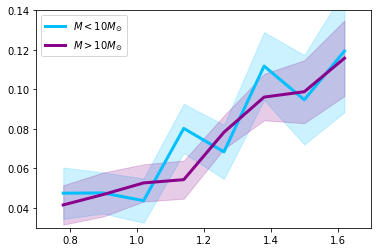

In [21]:
divider(rad,f,par,label0='$M<10M_{\odot}$',label1='$M>10M_{\odot}$',xlim=(0.7,1.7),ylim=(0.03,0.14))